# Implementatie van Lloyds algoritme

- Auteur: Jimmy Bierenbroodspot
- Datum: 20 juni 2024
- Locatie: Hogeschool Utrecht

## Inleiding

in dit document zullen we een error-functie voor ons clusteringsmodel
implementeren en vervolgens zullen we kijken of deze functie overeenkomt met
onze verwachtingen.

In [84]:
from typing import Any
import sys
sys.path.append("../")

import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes

from src.algorithm.clustering import ClusteringModel

## WCSS

Voor onze error functie gaan we de iets dat bekend staat als de Within-Cluster
Sum of Squares (WCSS). Dit doen we met de volgende stappen:

1. Voor elk clustercentrum sommeer het volgende:
2. Voor elk bijbehorend datapunt per clustercentrum sommeer de Euclidische 
afstand zonder wortel erbij te betrekken.

In [85]:
def get_wcss[DataT: Any](
        data: npt.NDArray[DataT], 
        closest_centers: npt.NDArray[np.int64], 
        cluster_centers: npt.NDArray[DataT]
) -> np.float64:
    closest_center: np.int64
    data_point: npt.NDArray[DataT]
    result: np.float64 = np.float64(0.0)

    for closest_center in closest_centers:
        cluster: npt.NDArray[DataT] = data[closest_centers == closest_center, :]
        for data_point in cluster:
            result += np.sum((data_point - cluster_centers[closest_center]) ** 2)

    return result

We kunnen de manier uit `eerste_demo_lloyds.ipynb` gebruiken om een aantal test
clusters te genereren. Hieronder creëren we wederom 3 clusters.

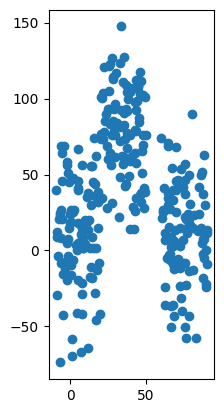

In [86]:
center_one: tuple[int, int] = (-10, 15)
center_two: tuple[int, int] = (20, 80)
center_three: tuple[int, int] = (60, 10)
distance: int = 30

demo_dataset: npt.NDArray[np.int64] = np.array([
    [
        *np.random.uniform(center_one[0], center_one[0] + distance, size=(100,)),
        *np.random.uniform(center_two[0], center_two[0] + distance, size=(100,)),
        *np.random.uniform(center_three[0], center_three[0] + distance, size=(100,)),
    ],
    [
        *np.random.normal(center_one[1], distance, size=(100,)),
        *np.random.normal(center_two[1], distance, size=(100,)),
        *np.random.normal(center_three[1], distance, size=(100,)),
    ],
]).T

plt.scatter(x=demo_dataset[:,0], y=demo_dataset[:,1]) # type: ignore
plt.gca().set_aspect("equal", adjustable="box")

plt.show() # type: ignore

Voor de elleboog-methode moeten we het model voor meerdere aantallen aan 
clustercentra uitvoeren en de WCSS noteren. 

In [87]:
run_count: int = 9

model_score: npt.NDArray[np.float64] = np.zeros((run_count,))

for i in range(1, run_count):
    model: ClusteringModel[np.int64] = ClusteringModel(demo_dataset, i + 1, "lloyds")
    model.train(demo_dataset)
    model_score[i] = get_wcss(demo_dataset, model.closest_centers, model.cluster_centers)

print(model_score)

[       0.         74681460.2511577  25336804.41006113 15769504.24127109
  9493561.12383547  6718921.84171833  4253232.55973572  3506601.54616417
  2816580.83189369]


Uiteindelijk zetten we dit in een grafiek met het aantal clusters op de x-as en
de WCSS op de y-as.

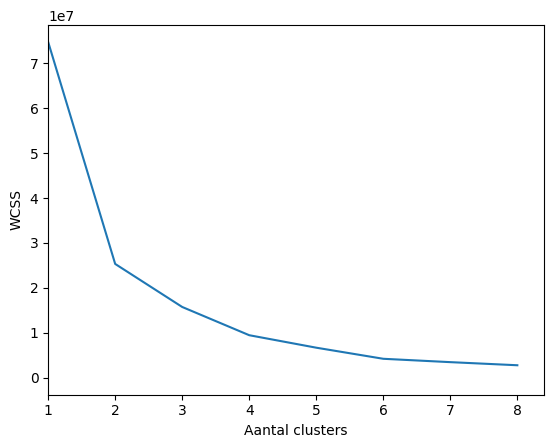

In [88]:
plt.plot(model_score)
plt.xlim(left=1)
plt.xlabel("Aantal clusters")
plt.ylabel("WCSS")
plt.show()

We zien bovenaan de y-as dat de waarde van WCSS best hoog kan zijn. Dit is omdat
het kwadraat van alle afstanden in de dataset berekend wordt, dit zal oplopen
naarmate de dataset groter wordt. Dit kan onder andere door de dataset te
standaardiseren naar waardes tussen 0 en 1 maar dit is niet per se belangrijk.